In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [10]:
import seaborn as sns

In [11]:
df = df.drop(['Serial No.'],axis=1)

In [12]:
df.rename(columns = {'Chance of Admit ':'Chance', 'LOR ':'LOR'}, inplace = True)

In [13]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance'],
      dtype='object')

## Data Visualization

<Axes: >

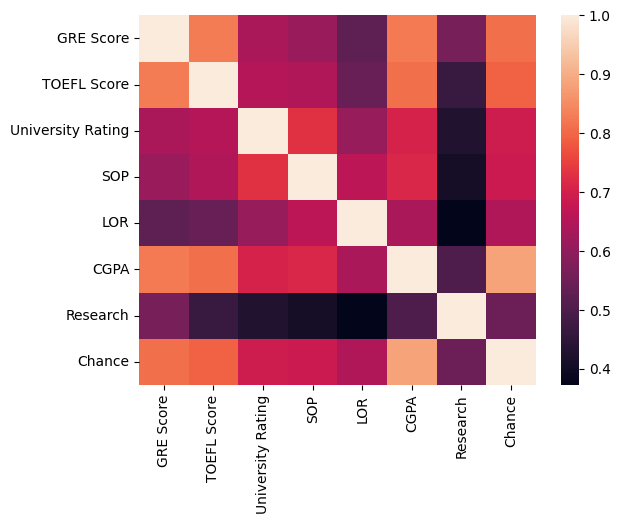

In [14]:
sns.heatmap(df.corr())

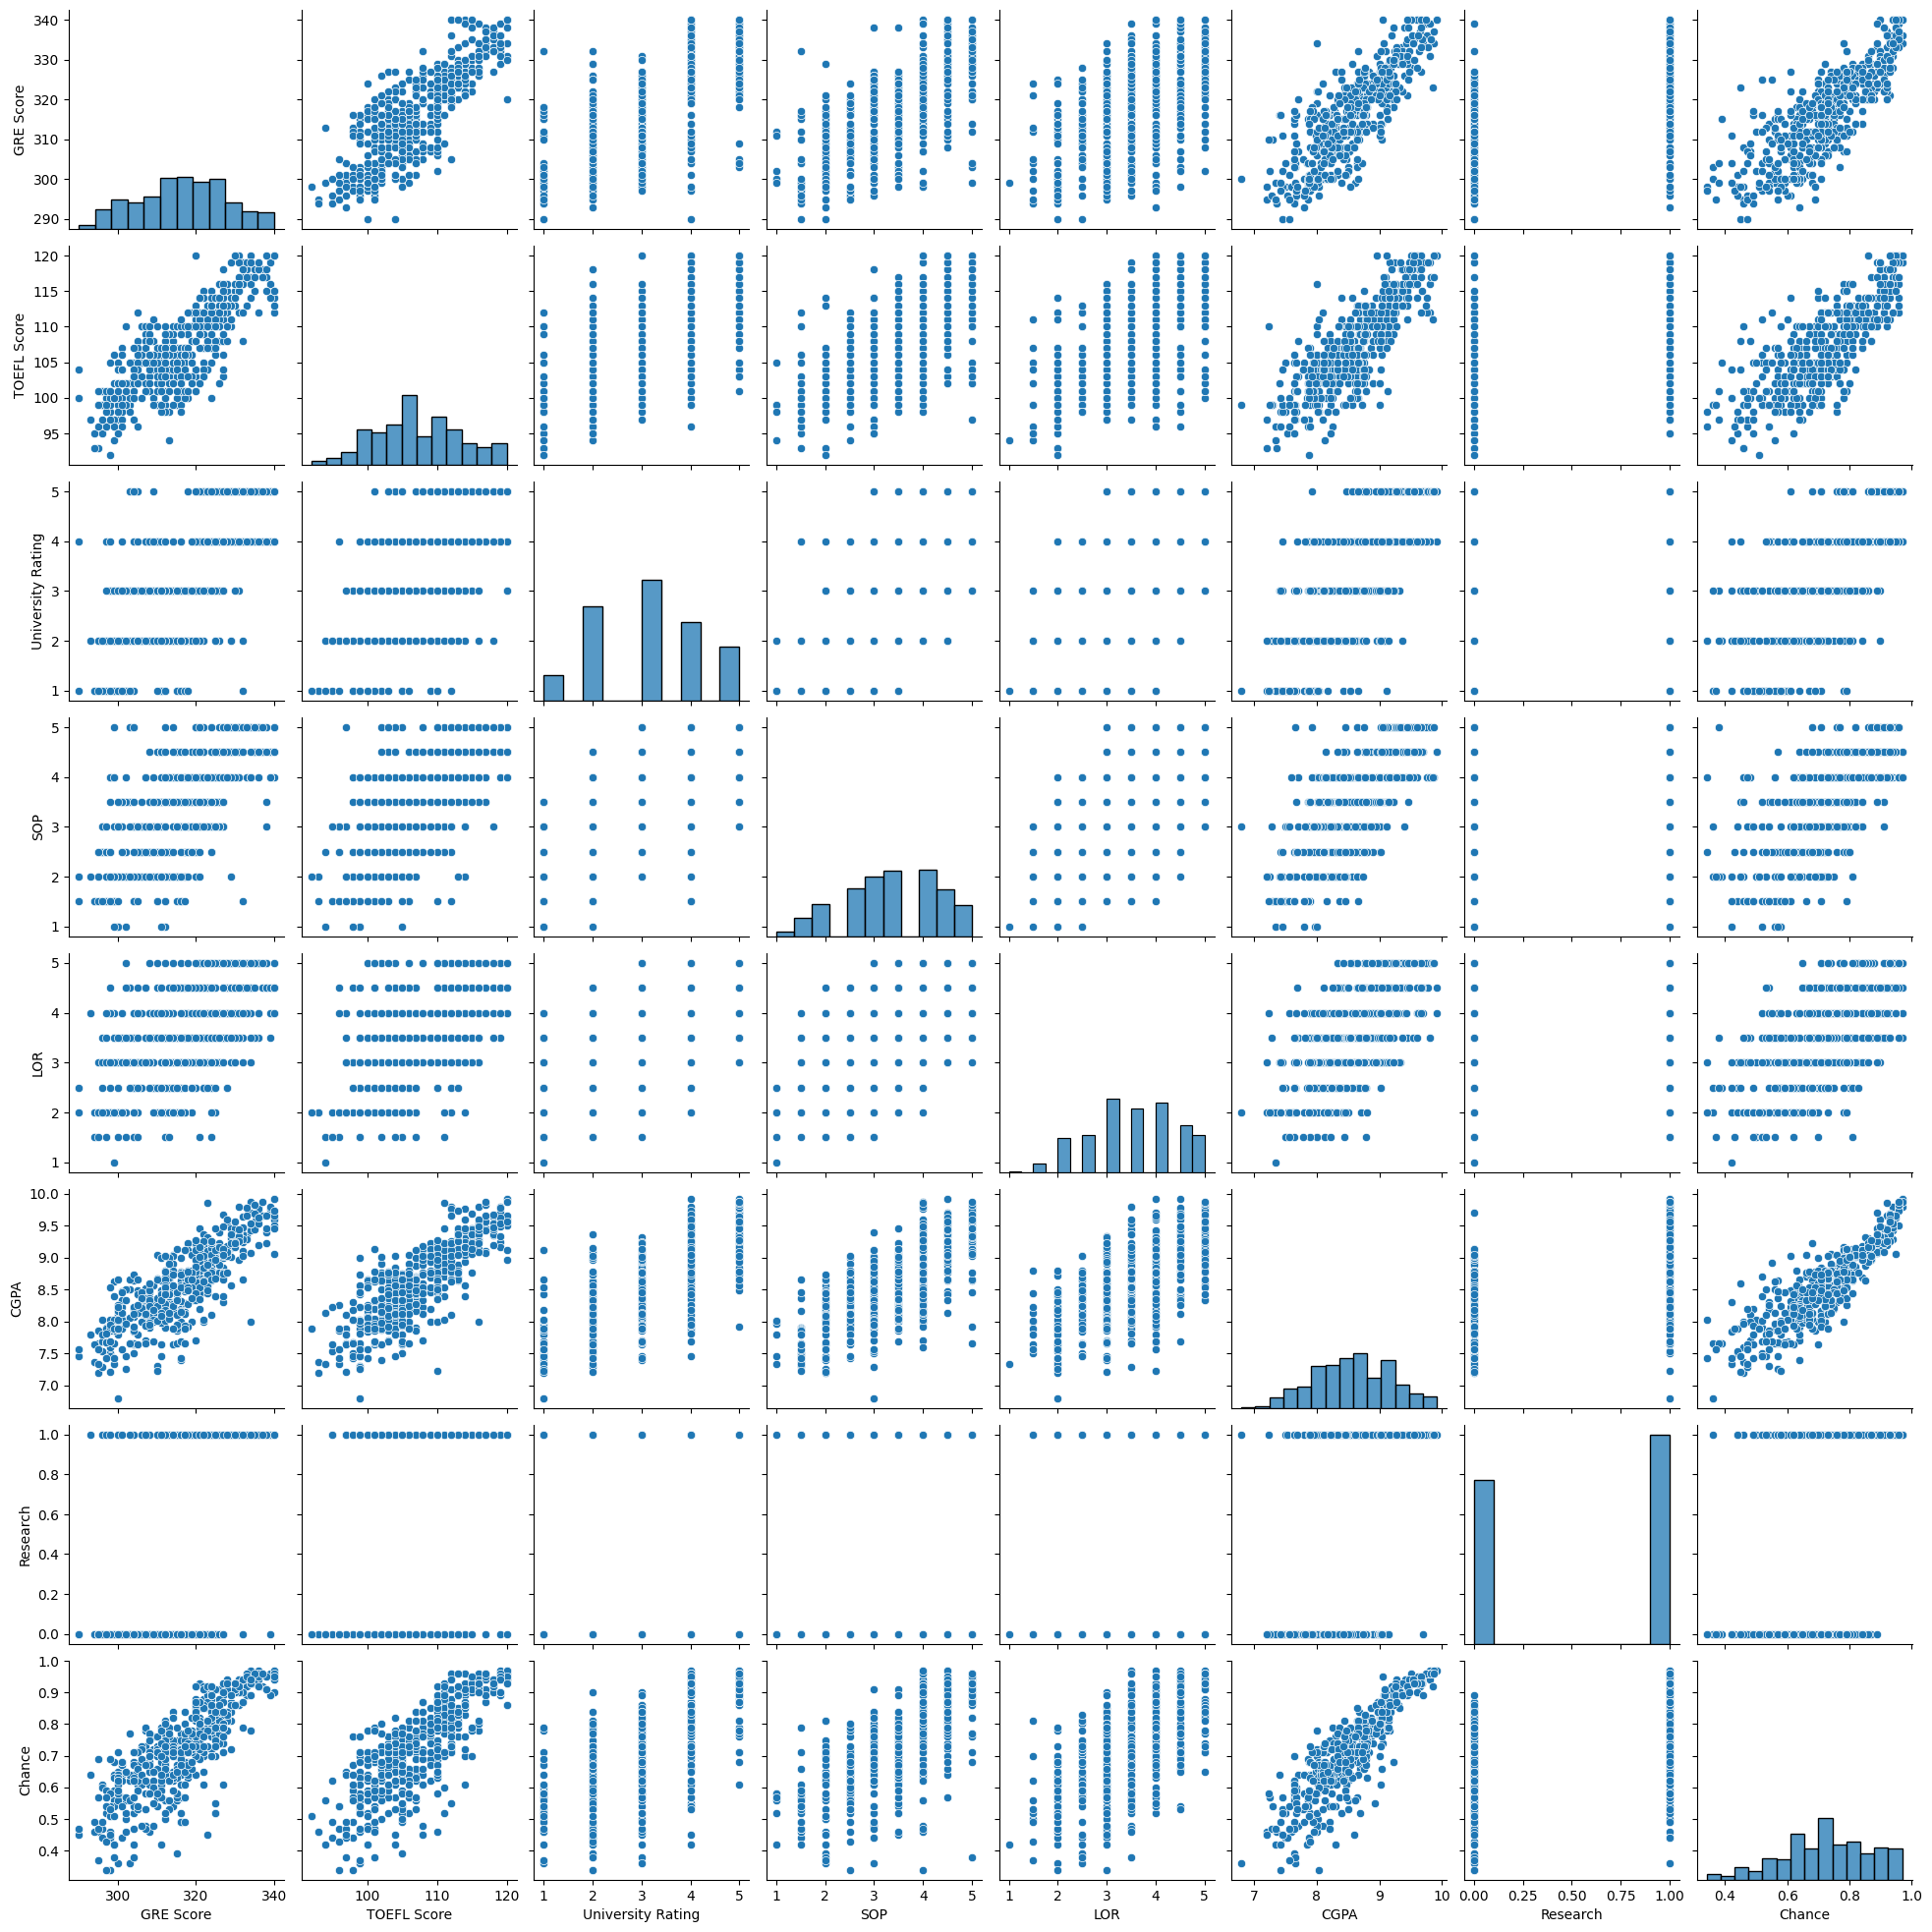

In [15]:
sns.pairplot(data= df)

<Axes: xlabel='Chance', ylabel='LOR'>

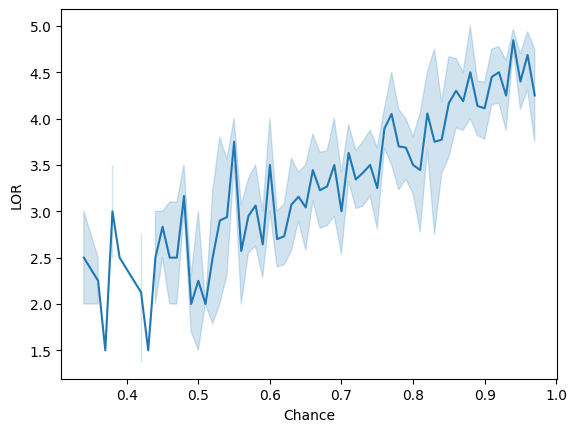

In [16]:
sns.lineplot(data = df,  x="Chance",y="LOR")

<Axes: xlabel='Chance', ylabel='TOEFL Score'>

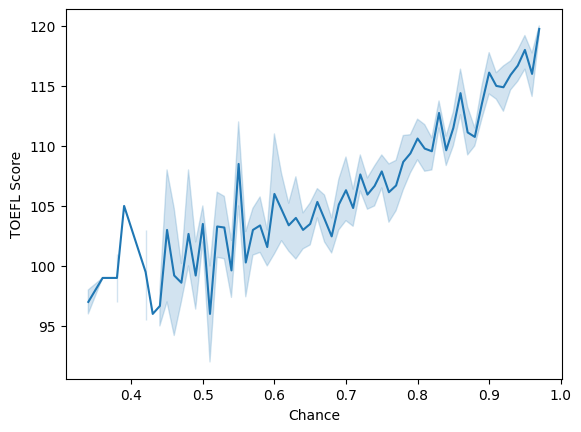

In [17]:
sns.lineplot(data = df,  x="Chance",y="TOEFL Score")

<Axes: xlabel='Chance', ylabel='GRE Score'>

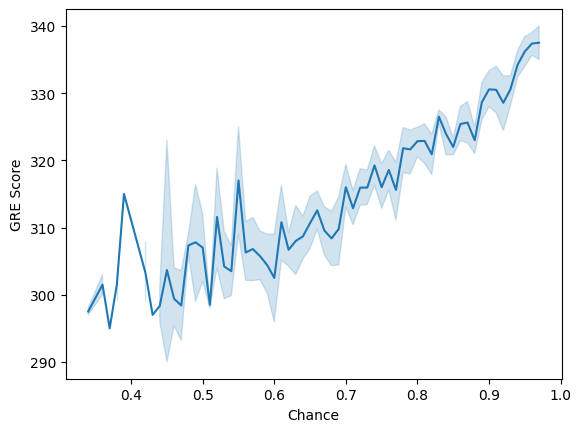

In [18]:
sns.lineplot(data = df,  x="Chance",y="GRE Score")

<Axes: xlabel='Chance', ylabel='CGPA'>

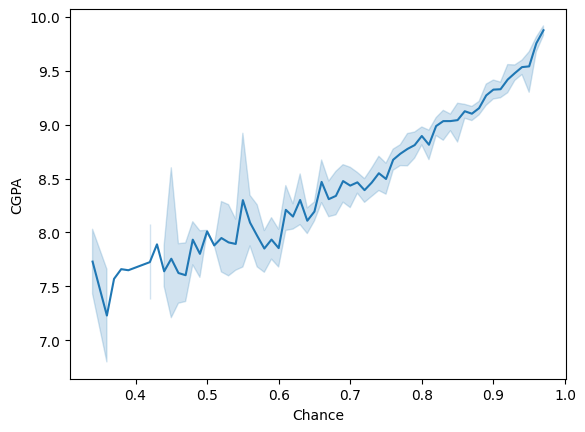

In [19]:
sns.lineplot(data = df,  x="Chance",y="CGPA")

<Axes: xlabel='Chance', ylabel='SOP'>

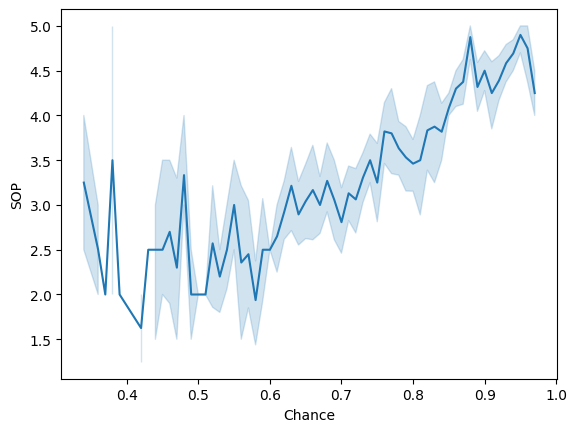

In [20]:
sns.lineplot(data = df,  x="Chance",y="SOP")

## Linear Regression Model Preparation


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X, y = df.iloc[:,:-1],df["Chance"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
preds = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score


In [30]:
mean_squared_error(y_test,preds)

0.0033245482935572923

In [31]:
r2_score(y_test,preds)

0.8185677278975833

In [32]:
from scipy.special import expit

In [33]:
def ok(s):
    if s>=0.5:
        return "YES"
    else:
        return "NO"

In [34]:
admission = y.apply(ok)

In [35]:
admission.value_counts()

Chance
YES    463
NO      37
Name: count, dtype: int64

<Axes: xlabel='Chance', ylabel='Count'>

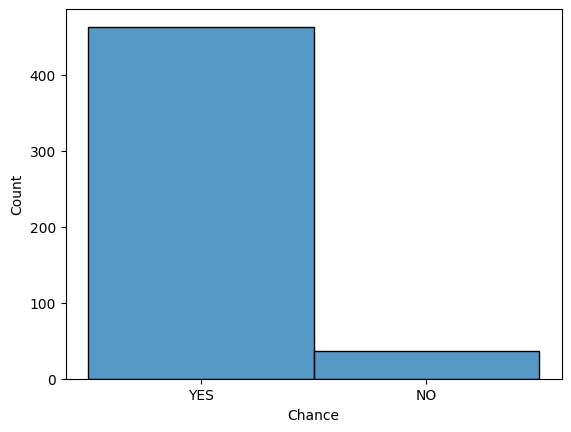

In [36]:
sns.histplot(admission)

## Linear Regression model is performing very well in this case.

In [46]:
X,y = df.iloc[:,:-1],df["Chance"]

In [47]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

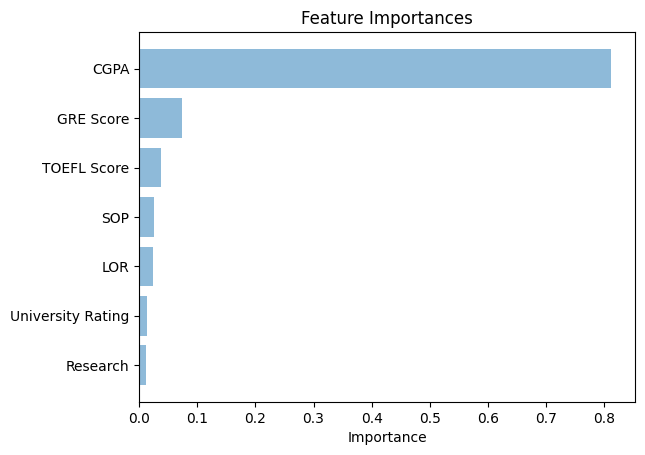

In [48]:
import matplotlib.pyplot as plt
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()